# Analysis notebook: `gamma_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "gamma_CRY_offspill-LH_as"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/gamma_CRY_offspill-LH_as

analysis.csv	gamma_CRY_offspill-LH_as.log   info.txt
cut_flow.csv	gamma_CRY_offspill-LH_as.yaml  results.pkl
events.parquet	hists.h5


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/gamma_CRY_offspill-LH_as


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/gamma_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/gamma_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/gamma_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/gamma_CRY_offspill-LH_as/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/gamma_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../../output/results/gamma_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,5754129,100.000,100.000,No selection applied
1,has_trk_front,Preselect,5732419,99.623,99.623,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,5246599,91.180,91.525,Electron track fits
3,is_downstream,Preselect,3256493,56.594,62.069,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,2109815,36.666,64.788,One reco electron / event
5,is_truth_electron,Preselect,845921,14.701,40.095,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,366750,6.374,43.355,Track fit quality > 0.8
7,has_hits,Tracker,365722,6.356,99.720,>20 active tracker hits
8,within_d0,Tracker,52603,0.914,14.383,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle_lo,Tracker,44228,0.769,84.079,Extrapolated pitch angle (pz/pt > 0.557735)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,25921,3251,351,8,1,0
1,N,41100000000,41100000000,41100000000,25921,3251,351
2,Eff [%],0.000063,0.000008,0.000001,99.969137,99.96924,100.0
3,Eff Err$-$ [%],-0.0,-0.0,-0.0,-0.013006,-0.049741,-0.284091
4,Eff Err$+$ [%],0.0,0.0,0.0,0.009151,0.01901,0.0
5,Rate 1B [$\text{day}^{-1}$],142.843974,17.915426,1.934271,0.044086,0.005511,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.882327,-0.312472,-0.102643,-0.015191,-0.00455,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.887814,0.31799,0.108259,0.02163,0.012611,0.006279
8,Rate 2B [$\text{day}^{-1}$],158.855983,19.923645,2.151092,0.049028,0.006128,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.981231,-0.347498,-0.114149,-0.016894,-0.00506,0.0


[HistAnalyser] ⭐️ Initialised
[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Wrote ../../../output/images/gamma_CRY_offspill-LH_as/h1_1x2_walltime_projection.png


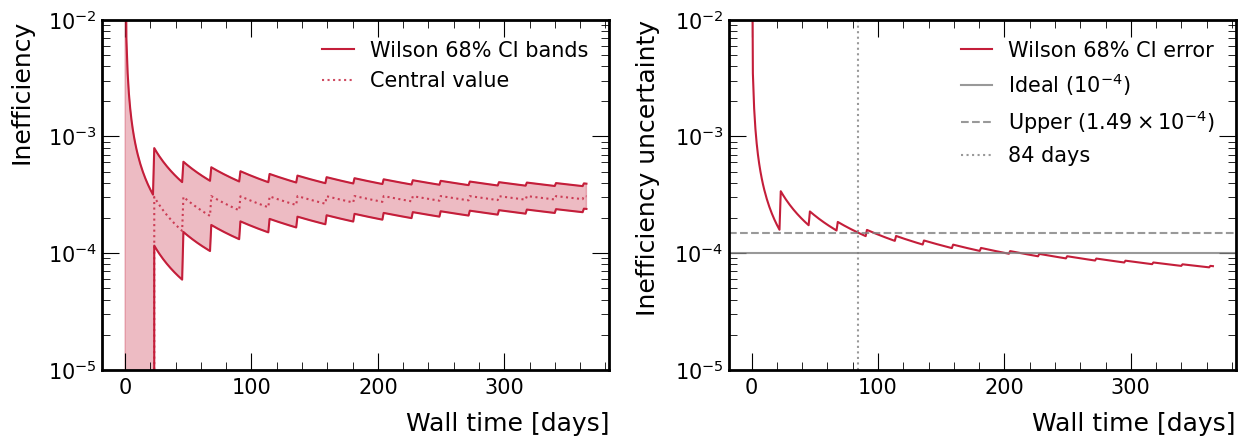

In [37]:
import numpy as np

# Single batch rates
rate1b_bk = results["analysis"].at[5, "No veto (wide)"]
rate1b_sg = results["analysis"].at[5, "CE-like (wide)"]

# rate1b_err_lo = results["analysis"].at[6, "No veto (wide)"]
# rate1b_err_lo = results["analysis"].at[7, "No veto (wide)"]
# Time in days (0 to 1000 days in 1000 steps)
t = np.linspace(0, 365, 365)

# Find the target time numerically
def get_target_time(t, unc, offset, target=1e-4):
    for i, value in enumerate(unc):
        if np.isnan(value) or value <= 0:
            continue
        if value <= target + offset:
            return t[i]

k = np.array(rate1b_bk * t).astype(int)
N = np.array(rate1b_sg * t).astype(int)

ineff = k / N

###

from hist_analyser import HistAnalyser 
ha = HistAnalyser()

ineff = []
ineff_err_low = [] # np.array([])
ineff_err_hi = [] # np.array([])

for t_ in t: 
    k = int(rate1b_bk * t_)
    N = int(rate1b_sg * t_) 
    # if N == 0: continue
    ineff.append(k/N if N > 0 else np.nan)
    lo, hi = ha._get_wilson_bounds(k, N) 
    ineff_err_low.append(lo)
    ineff_err_hi.append(hi)

# Convert to numpy arrays first
ineff = np.array(ineff)
ineff_err_low = np.array(ineff_err_low)
ineff_err_hi = np.array(ineff_err_hi)

# Now you can do arithmetic
ineff_err = (ineff_err_hi - ineff_err_low) / 2
    
from pyutils.pyplot import Plot
import matplotlib.pyplot as plt
plotter = Plot()

fig, ax = plt.subplots(1,2, figsize=(2*6.4, 4.8))
ax[0].plot(t, ineff_err_low, color="#C41E3A", label="Wilson 68% CI bands")
ax[0].plot(t, ineff_err_hi, color="#C41E3A")
ax[0].plot(t, ineff, color="#C41E3A", label="Central value", linestyle=":", alpha=0.8)
ax[0].set_ylabel("Inefficiency")
ax[0].set_xlabel("Wall time [days]")
ax[0].set_yscale("log")
ax[0].set_ylim(1e-5, 1e-2)
ax[0].legend(loc="upper right") # , labels=["a", "b"])

# Fill between
ax[0].fill_between(t, ineff_err_low, ineff_err_hi, color="#C41E3A", alpha=0.3, label="Uncertainty band")

# LINE

# ax[0].axhline(1-0.999, color="gray", linestyle="--", alpha=0.7, label=r"Target ($10^{-3}$)")

# plt.show()


# fig, ax = plt.subplots()
ax[1].plot(t, ineff_err, color="#C41E3A", label="Wilson 68% CI error")
# ax.plot(t, ineff_err_hi, color="#C41E3A")
ax[1].set_ylabel("Inefficiency uncertainty")
ax[1].set_xlabel("Wall time [days]")
ax[1].set_yscale("log")
ax[1].set_ylim(1e-5, 1e-2)
# ax[1].legend(loc="upper right") # , labels=["a", "b"])

# Fill between
# ax.fill_between(t, ineff_err_low, ineff_err_hi, color="#C41E3A", alpha=0.3, label="Uncertainty band")

# LINE

# ax[1].axhline(1e-4+0.5e-4, color="gray", linestyle="--", alpha=0.7, label=r"Target ($1.5\times10^{-4}$)") # , label=r"")
ax[1].axhline(1e-4, color="gray", linestyle="-", alpha=0.8, label=r"Ideal ($10^{-4}$)")
ax[1].axhline(1e-4+0.499e-4, color="gray", linestyle="--", alpha=0.8, label=r"Upper ($1.49\times10^{-4}$)") # , label=r"")

target_time = get_target_time(t, ineff_err, 0.5e-4)
ax[1].axvline(target_time, color="gray", linestyle=":", alpha=0.8, label=f"{target_time:.0f} days")
# ax[1].fill_between(t, 1e-4+0.5e-4, 1e-4, color="grey", alpha=0.3) # , label="Uncertainty band")

ax[1].legend(loc="upper right") # , labels=["a"])

# ax.axhline(1e-4+0.5e-4, color="gray", linestyle="--", alpha=0.7, label=r"")
plt.tight_layout()

img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

out_path=f"{img_dir}/h1_1x2_walltime_projection.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

# fig, ax = plt.subplots()
# ax.plot(t, N, label=ana_label, color="r")
# ax.set_xlabel("Wall time [days]")
# ax.set_ylabel("Events")
# ax.set_yscale("log")
# ax.legend(loc="upper left")
# plt.show()

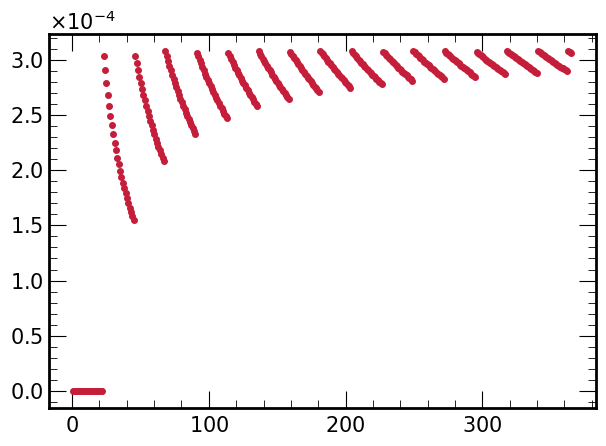

In [32]:
plotter.plot_graph(x=t, y=ineff, col="#C41E3A")

### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/gamma_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


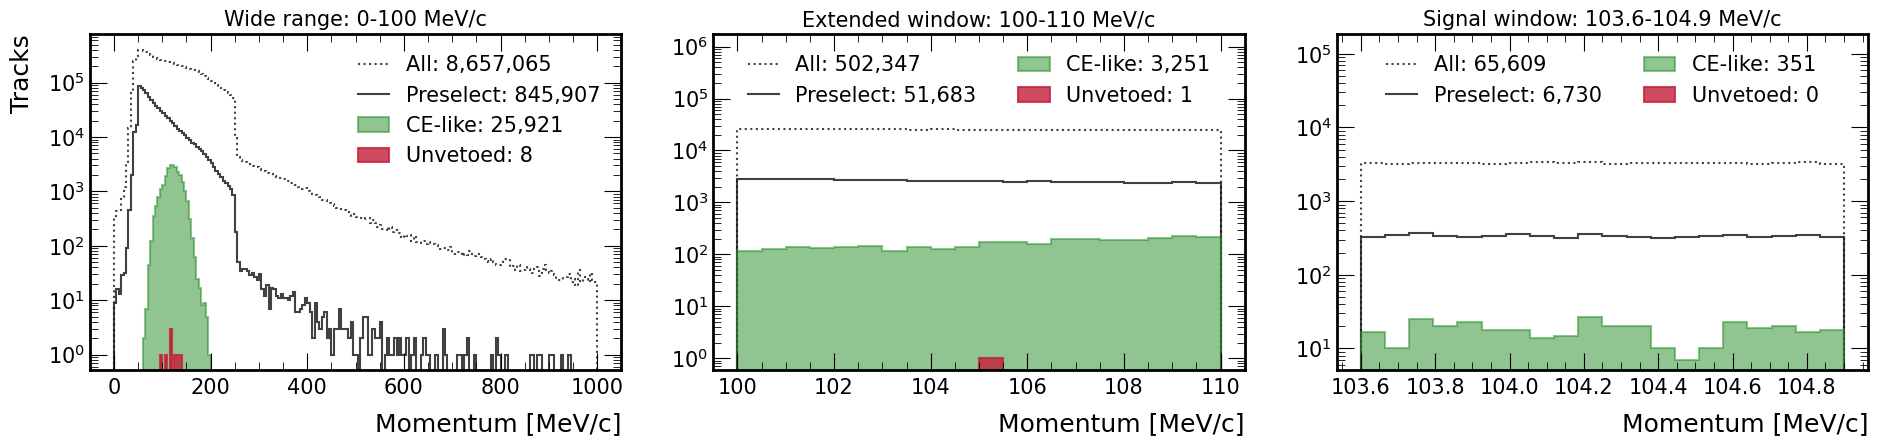

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/gamma_CRY_offspill-LH_as/h1o_3x3_summary.png


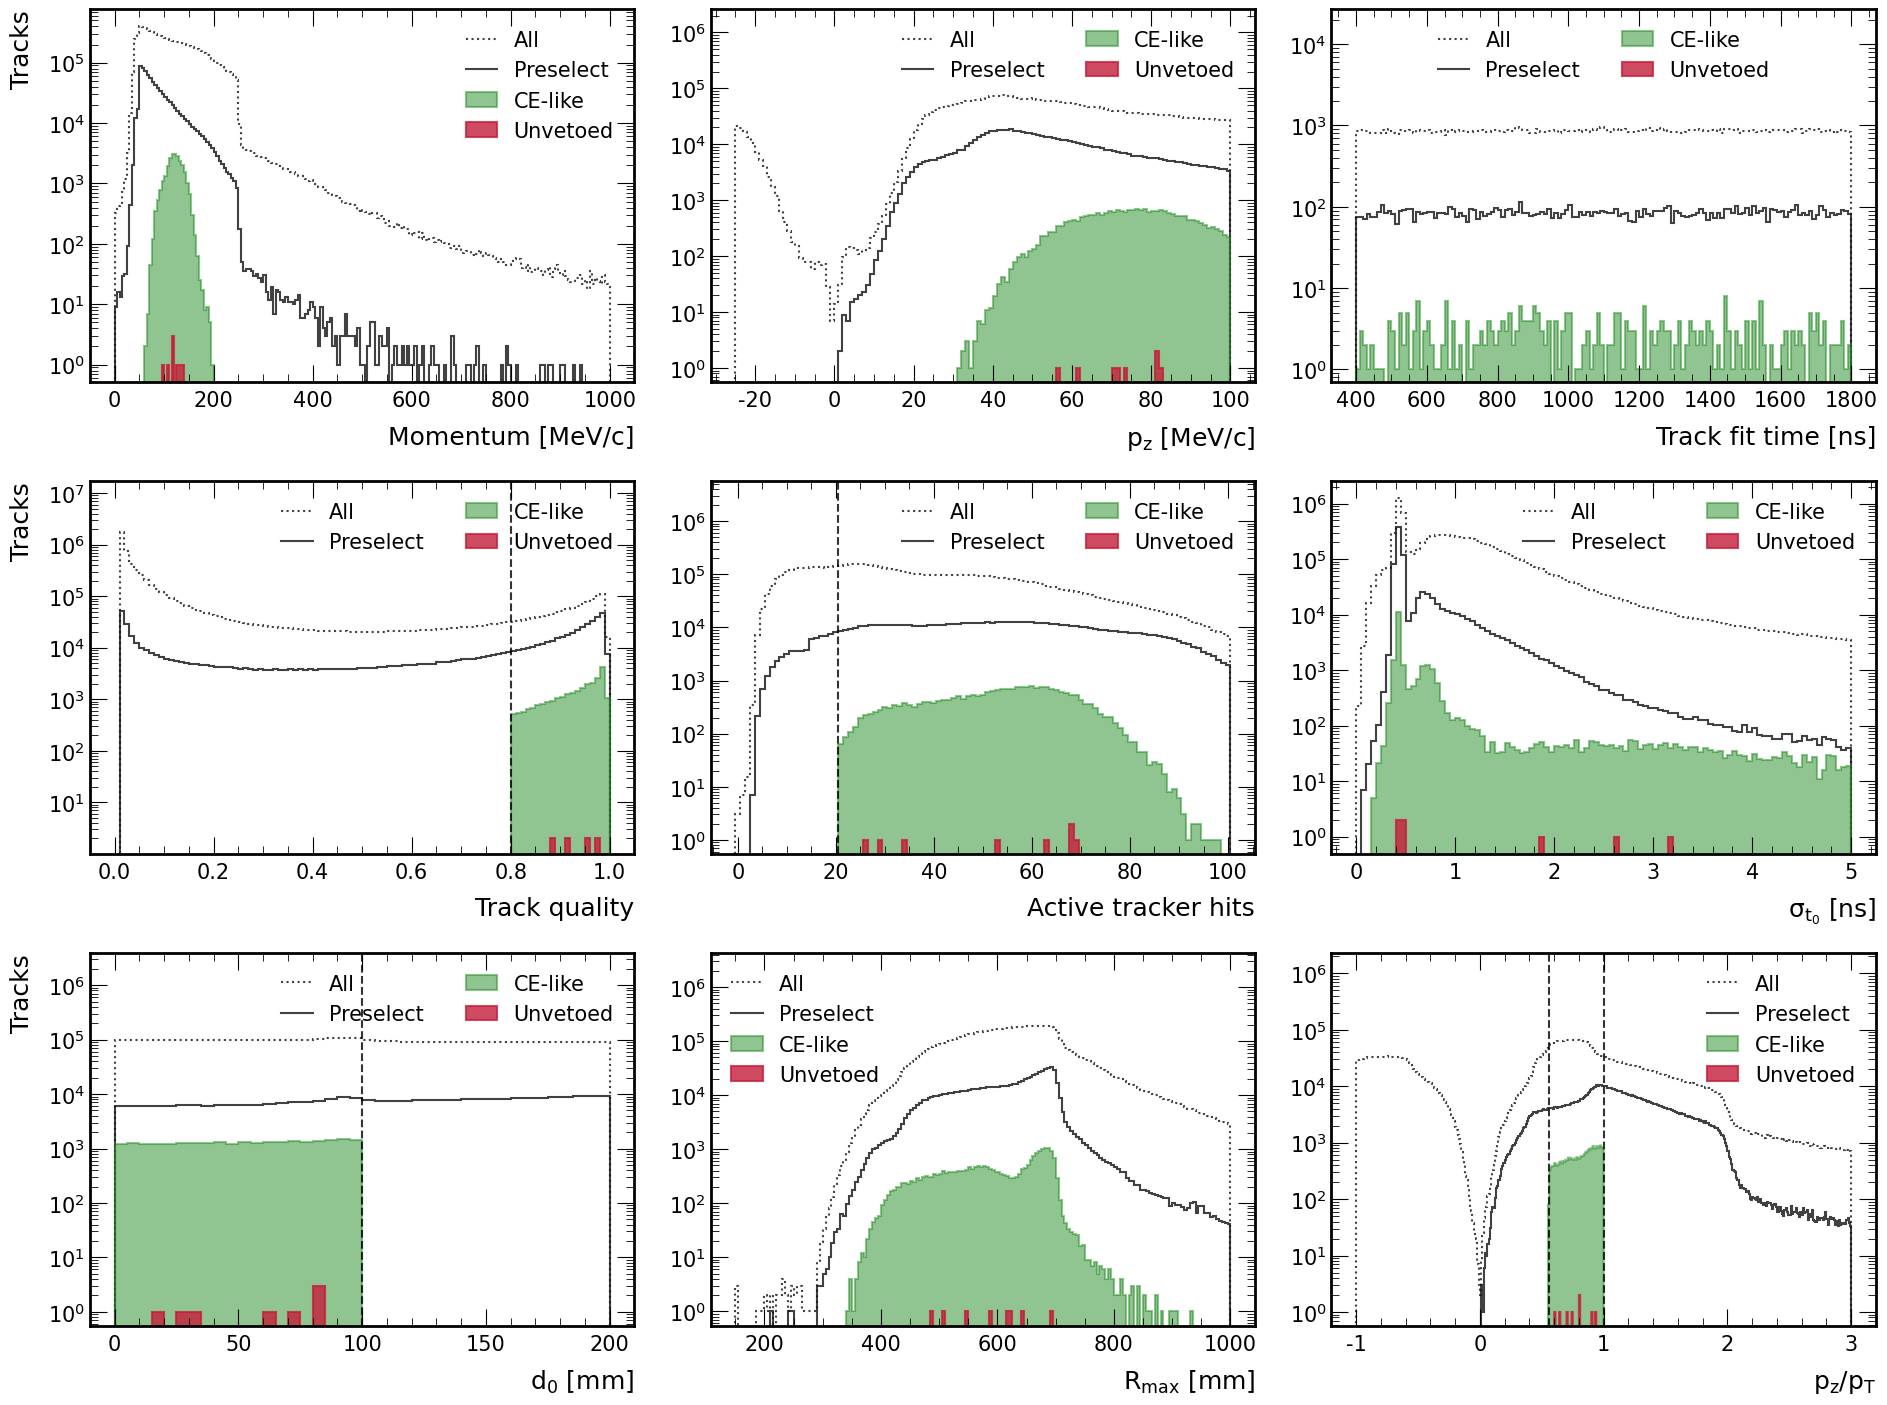

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/gamma_CRY_offspill-LH_as/h1o_2x2_mom_summary.png


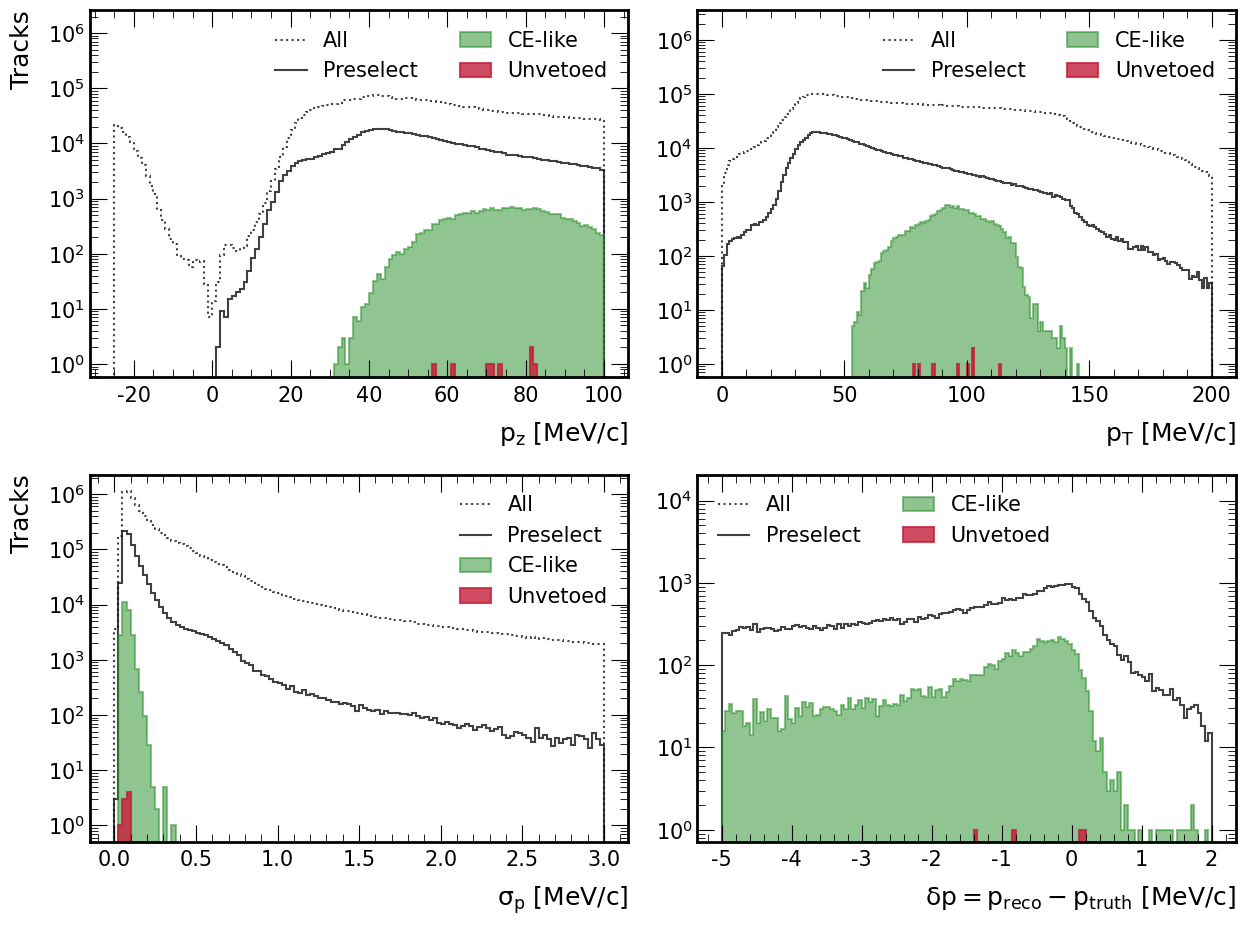

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/gamma_CRY_offspill-LH_as/h1o_crv_z.png


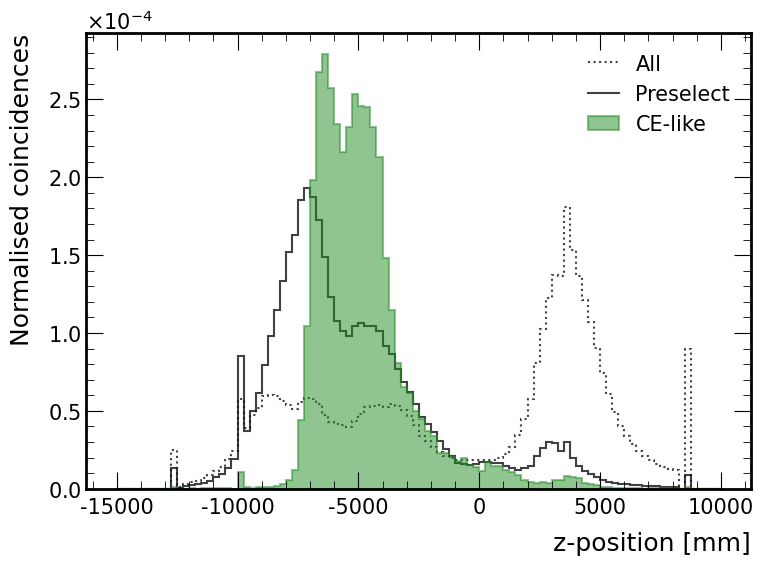

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [13]:
print(results["event_info"])

  Index:            41
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  59076.573926
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            203
  Subrun:           [18802]
  Event:            [50292]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015287.root
  Track time [ns]:  86861.975560
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            218
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  31331.604162
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            254
  Subrun: 

In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 8 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, False, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, True, False]
has_hits: [True, True, True, True]
within_t0err: [True, False, True, False]
within_d0: [True, True, True, True]
pitch_angle: [[0.246, 0.552, 0.554, 0.555, 0.692, 0.899, 0.94, 0.963, 0.979], ..., [...]]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, Tru